In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', ]]
y = df['Chance of Admit ']

In [26]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


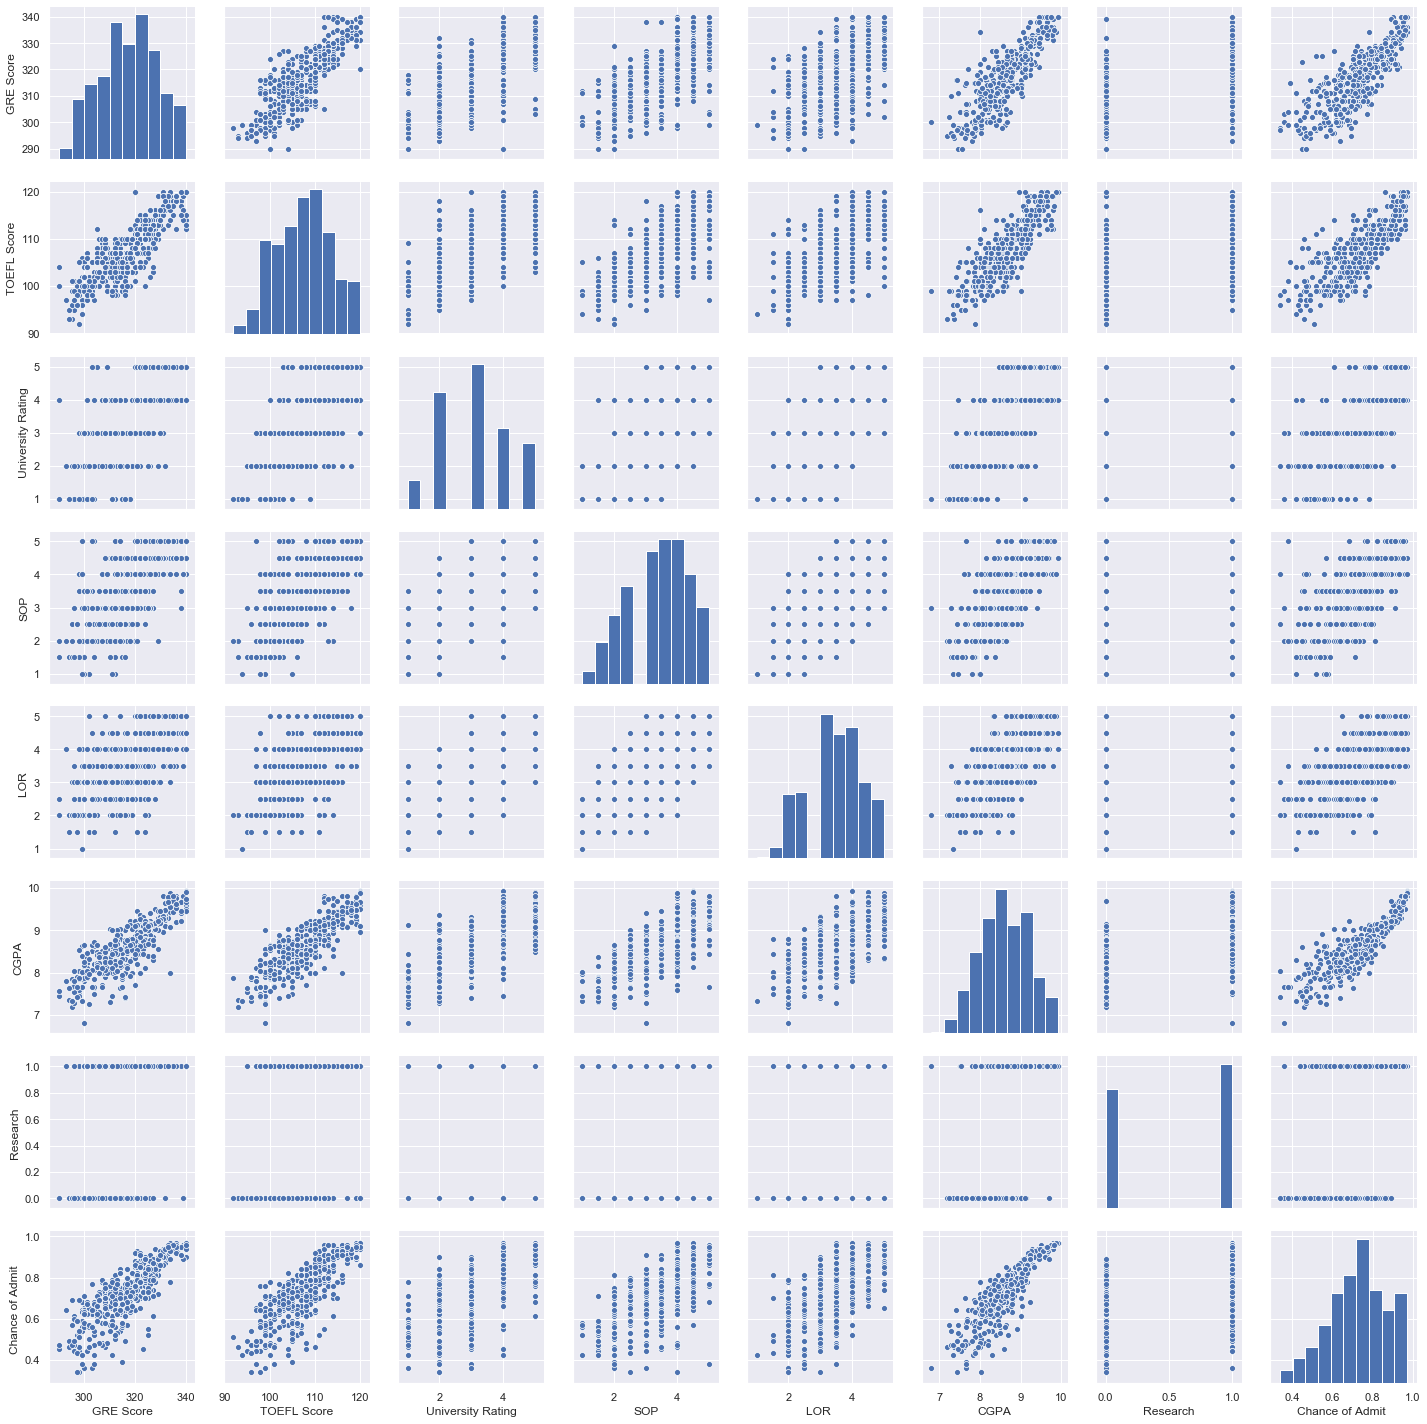

In [27]:
sns.set()
sns.set_style('darkgrid')
sns.pairplot(df[['GRE Score', 'TOEFL Score','University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']])

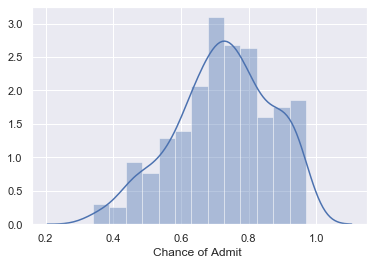

In [23]:
sns.distplot(df['Chance of Admit '])

(8.0, 0.0)

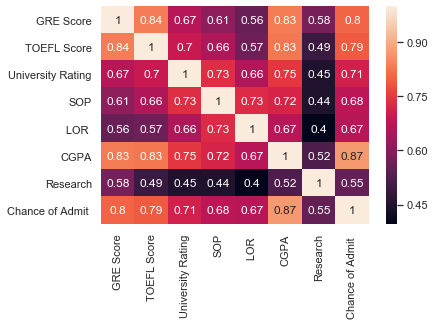

In [31]:
ae = sns.heatmap(df[['GRE Score', 'TOEFL Score','University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']].corr(),annot=True)


bottom, top = ae.get_ylim()
ae.set_ylim(bottom + 0.5, top - 0.5)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [35]:
#import sklearn for linear regression
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lm.intercept_

-1.400807751325246

In [42]:
lm.coef_

array([ 0.0023919 ,  0.00308291,  0.01130127, -0.00185234,  0.01878345,
        0.10911333,  0.00969571])

In [43]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coef'])

In [44]:
cdf

,coef
GRE Score,0.002392
TOEFL Score,0.003083
University Rating,0.011301
SOP,-0.001852
LOR,0.018783
CGPA,0.109113
Research,0.009696


In [45]:
y_pred = lm.predict(X_test)

In [51]:
y_test

38     0.52
387    0.53
270    0.72
181    0.71
195    0.78
       ... 
32     0.91
261    0.71
218    0.84
70     0.94
198    0.70
Name: Chance of Admit , Length: 132, dtype: float64

In [52]:
y_pred

array([0.50230492, 0.62566912, 0.63574864, 0.64225778, 0.6855059 ,
       0.69702514, 0.80869952, 0.48953549, 0.86106051, 0.81055544,
       0.7936463 , 0.69282816, 0.89176355, 0.98649085, 0.57691989,
       0.7511946 , 0.69818895, 0.66350935, 0.50058284, 0.64962916,
       0.56625023, 0.65748297, 0.76681879, 0.61100155, 0.4629894 ,
       0.80518   , 0.76152748, 0.71687004, 0.51904997, 0.81977998,
       0.72521272, 0.68225313, 0.5446814 , 0.89117383, 0.51957982,
       0.57390105, 0.67269071, 0.58293808, 0.71698482, 0.71439432,
       0.62751974, 0.85893827, 0.89854122, 0.75921005, 0.71360867,
       0.95852053, 0.6260447 , 0.73067369, 0.54733203, 0.69772191,
       0.59705433, 0.90890356, 0.78694594, 0.52535155, 0.74086589,
       0.742621  , 0.73574015, 0.61101331, 0.63885736, 0.53936848,
       0.51471195, 0.69583975, 0.56347772, 0.53960502, 0.72538656,
       0.59887931, 0.67913592, 0.64082323, 0.51591045, 0.66482107,
       0.49604521, 0.79960065, 0.80279891, 0.74197876, 0.65397

In [57]:
tb = pd.DataFrame(y_test)

In [60]:
tb['pred'] = y_pred

tb

,Chance of Admit,pred
38,0.52,0.502305
387,0.53,0.625669
270,0.72,0.635749
181,0.71,0.642258
195,0.78,0.685506
...,...,...
32,0.91,0.930973
261,0.71,0.651369
218,0.84,0.807120
70,0.94,0.959797


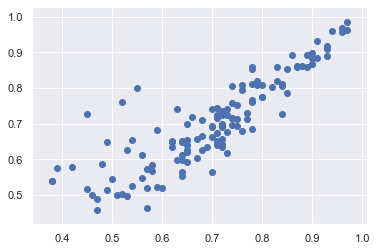

In [46]:
plt.scatter(y_test,y_pred)

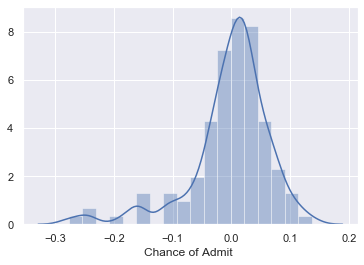

In [47]:
sns.distplot((y_test-y_pred))

In [49]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.04725499639197657
0.0047063181924947356
0.06860261068279207


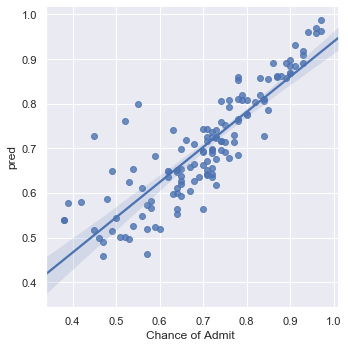

In [67]:
sns.lmplot(x='Chance of Admit ',y='pred',data=tb)

In [63]:
tb

,Chance of Admit,pred
38,0.52,0.502305
387,0.53,0.625669
270,0.72,0.635749
181,0.71,0.642258
195,0.78,0.685506
...,...,...
32,0.91,0.930973
261,0.71,0.651369
218,0.84,0.807120
70,0.94,0.959797


In [69]:
y_test

38     0.52
387    0.53
270    0.72
181    0.71
195    0.78
       ... 
32     0.91
261    0.71
218    0.84
70     0.94
198    0.70
Name: Chance of Admit , Length: 132, dtype: float64

In [72]:
y_pred

array([0.50230492, 0.62566912, 0.63574864, 0.64225778, 0.6855059 ,
       0.69702514, 0.80869952, 0.48953549, 0.86106051, 0.81055544,
       0.7936463 , 0.69282816, 0.89176355, 0.98649085, 0.57691989,
       0.7511946 , 0.69818895, 0.66350935, 0.50058284, 0.64962916,
       0.56625023, 0.65748297, 0.76681879, 0.61100155, 0.4629894 ,
       0.80518   , 0.76152748, 0.71687004, 0.51904997, 0.81977998,
       0.72521272, 0.68225313, 0.5446814 , 0.89117383, 0.51957982,
       0.57390105, 0.67269071, 0.58293808, 0.71698482, 0.71439432,
       0.62751974, 0.85893827, 0.89854122, 0.75921005, 0.71360867,
       0.95852053, 0.6260447 , 0.73067369, 0.54733203, 0.69772191,
       0.59705433, 0.90890356, 0.78694594, 0.52535155, 0.74086589,
       0.742621  , 0.73574015, 0.61101331, 0.63885736, 0.53936848,
       0.51471195, 0.69583975, 0.56347772, 0.53960502, 0.72538656,
       0.59887931, 0.67913592, 0.64082323, 0.51591045, 0.66482107,
       0.49604521, 0.79960065, 0.80279891, 0.74197876, 0.65397

In [73]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
